## Домашнее задание
### 1. Нелинейная регрессия

Дан набор точек. Реализуйте какой-нибудь алгоритм нелинейной регрессии для моделей из семейства функций:

$$
\check{y}=w_1 \cdot x^{w_2}+w_3 \cdot x^{w_4}
$$

Нормируйте данные, найдите наилучшие коэффициенты, удостоверьтесь, что нет переобучения.

In [271]:
from scipy.optimize import minimize # в данном методе реализовано много методов локальной минимизации
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [226]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202,
   0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098, 
     -2.55831541, -2.57056931, -2.59340317, -2.64026441, 
     -2.65975636, -2.69517476, -2.71046599, -2.74422696, 
     -2.76251291, -2.79505506, -2.79301352, -2.82852207, 
     -2.854651, -2.88654236, -2.92345136, -2.91943321, 
     -2.94240833, -2.9487781, -2.97926813, -2.99198343, 
     -3.03396292, -3.03814694, -3.04944858, -3.07196161, 
     -3.09883706, -3.11338258, -3.11898122, -3.14254571, 
     -3.18330957, -3.17453301, -3.20021237, -3.21213539, 
     -3.23715191, -3.24017664, -3.23640684, -3.26147762, 
     -3.28208909, -3.29453546, -3.31160478, -3.33188752, 
     -3.33320305, -3.35238927, -3.34176317, -3.37471911, 
     -3.37543159, -3.40452694, -3.40505804, -3.43358858, 
     -3.43596139, -3.43705603, -3.45264647, -3.46029402, 
     -3.45723979, -3.4720453, -3.47597438, -3.4795529, 
     -3.50118552, -3.5031452, -3.5097196, -3.51083668, 
     -3.51128397, -3.52708836, -3.5222885, -3.53317295, 
     -3.50965143, -3.51939652, -3.51659198, -3.50734187, 
     -3.50882329, -3.48129755, -3.49384658, -3.48813707, 
     -3.48345018, -3.46180698, -3.44784696, -3.42372263, 
     -3.39080674, -3.37867045, -3.35281766, -3.32575498, 
     -3.28934964, -3.26814804, -3.23547615, -3.1707224, 
     -3.12910072, -3.09300443, -3.02523152, -2.9453774, 
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]





[ 3.00860896  8.58447344 -3.99629476  0.24936601]


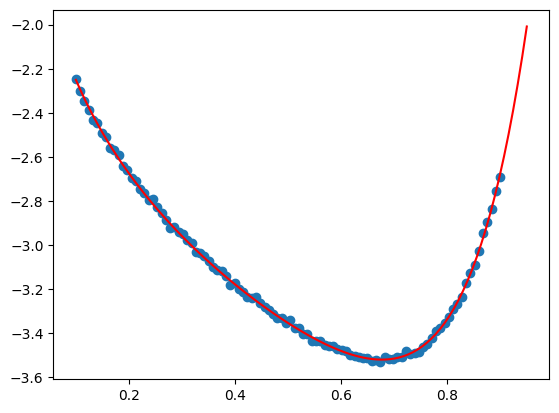

In [273]:


params = np.array([6.,10.,10.,10.])
data = np.array([x,y])

def func(params, data):
    x = data[0]
    return params[0]*x**params[1] + params[2]*x**params[3]

def less_func(params, data):
    (x, y) = data
    MSE = np.sum((y- params[0]*x**params[1] - params[2]*x**params[3])**2)
    return MSE

params = minimize(less_func, params, data)['x']
print(params)



plt.scatter(x,y)
x_true = np.linspace(0.1,0.95,100)
y_true = params[0]*x_true**params[1] + params[2]*x_true**params[3]
plt.plot(x_true, y_true, "r")
plt.show()

### 2. Американские горки

Реализуя ручками методы дихотомии и Фиббоначи (золотого сечения), найти точку локального минимума функций (любых двух из _а-ж_ на ваш выбор):

a) $f(x)=2 x^2-\ln x$

б) $f(t)=t^3 / 3+t^2$

в) $f(t)=t^4 / 4-2 t^2$

г) $f(t)=t e^{-t^2 / 2}$

д) $f(t)=3 t^4-8 t^3+6 t^2$

e) $f(t)=(t-5) e^t$

ж) $f(t)=\left(t^2-3\right) /(t+2)$.

Записали для фукний а), е)

In [220]:
def func1(x):
    return 2*x**2 - np.log(x)
def func2(x):
    return (x - 5)*np.exp(x)
def dih(func, eps, a, b):
    if (abs(b-a) < eps):
        c = (a+b)/2
        print(a,b)
        return c
    c = (a+b)/2
    if (func(c - eps) < func(c + eps)):
        a, b = a, c
        return dih(func, eps, a, b)
    else:
        a, b = c, b
        return dih(func, eps, a, b)



print(dih(func1, 0.1, 0.01, 5))
print(dih(func2, 0.01, 0.01, 5))

0.4778125 0.5557812499999999
0.5167968749999999
3.99615234375 4.0058984375
4.001025390625


In [221]:
def func1(x):
    return 2*x**2 - np.log(x)
def func2(x):
    return (x - 5)*np.exp(x)
def fib_number(n):
    if (n == 1) or (n == 2):  
        return 1
    return fib_number(n - 1) + fib_number(n-2)

count = 0
def fib(func1, n, a, b, count, x1 = 0, x2 = 0):
    if (n == 1):
        print(n, end = " ")
        return (x1 + x2)/2
    if (count == 0):
        count += 1
        x1, x2 = a + (b - a)*fib_number(n-2)/fib_number(n), a + (b - a)*fib_number(n-1)/fib_number(n)
        print(n, end = " ")
        return fib(func1, n - 1, a, b, count, x1, x2)
    if (func1(x1) > func1(x2)):
        a, x1 = x1, x2
        x2 = b - (x1 - a)
        print(n, end = " ")
        return fib(func1, n - 1, a, b, count, x1, x2)
    else:
        b, x2 = x2, x1
        x1 = a + (b - x2)
        print(n, end = " ")
        return fib(func1, n - 1, a, b, count, x1, x2)

print("\n", fib(func1, 20, 0, 2, 0))
print("\n", fib(func2, 20, 0, 5, 0))

20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 
 0.49977827050990764
20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 
 3.999630450849949


### 3. Функция Растригина.

$$
f\left(x_1, x_2\right)=20+x_1^2+x_2^2-10 \cos \left(2 \pi x_1\right)-10 \cos \left(2 \pi x_2\right)
$$

Постройте множество локальных минимумов и максимумов на плоскости используя `minimize`. Минимумы должны быть синими, максимумы - красными. В 3D график функции выглядит примерно так:

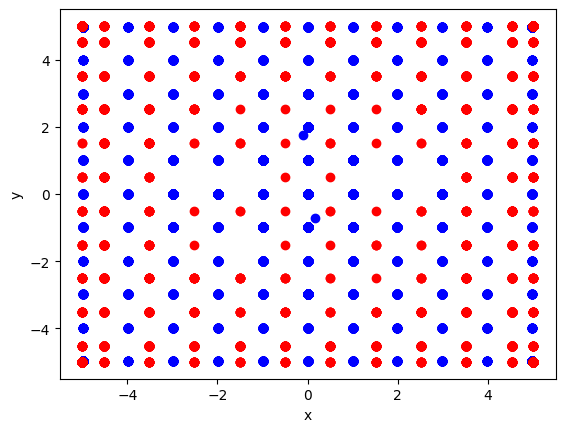

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

bounds = [(-5, 5)] * 2 
n_samples = 10000
x_min = []
x_max = []

for i in range(n_samples):
    x0 = np.random.uniform(low=-5, high=5, size=2)
    result = minimize(lambda params: 20 + params[0]**2 + params[1]**2 - 10*np.cos(2*np.pi*params[0]) - 10*np.cos(2*np.pi*params[1]), x0, bounds=bounds)['x']
    x_min.append(result)
    result = minimize(lambda params: -(20 + params[0]**2 + params[1]**2 - 10*np.cos(2*np.pi*params[0]) - 10*np.cos(2*np.pi*params[1])), x0, bounds=bounds)['x']
    x_max.append(result)

x_min = np.array(x_min)
x_max = np.array(x_max)


plt.scatter(x_min[:, 0], x_min[:, 1], c='blue')
plt.scatter(x_max[:, 0], x_max[:, 1], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 4. Градиенты градиентами

На этих рисунках изображены траектории движения в точку минимума методами сопряжённых градиентов и наискорейшего спуска:

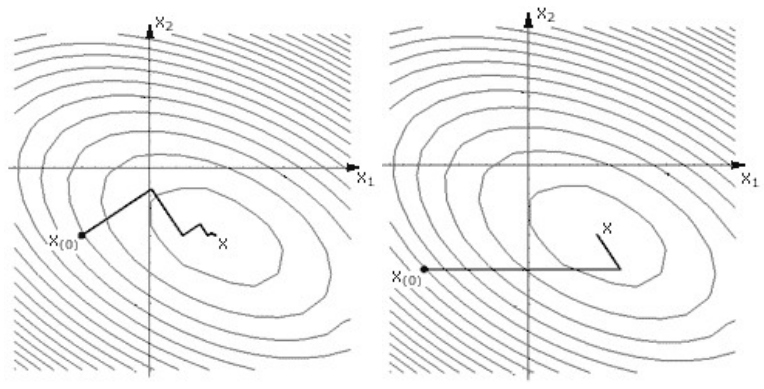

Определите, на каком из них какой из этих двух методов проиллюстрирован.  Ответ аргументируйте. Что изображают замкнутые линии? Докажите(*), что один из этих двух методов (какой?) позволяет решать квадратичные задачи за конечное число шагов. Каково максимально возможное количество этих шагов для матрицы размера n?

Слева изображен наискореший спуск, на правом - метод сопраженных градиентов
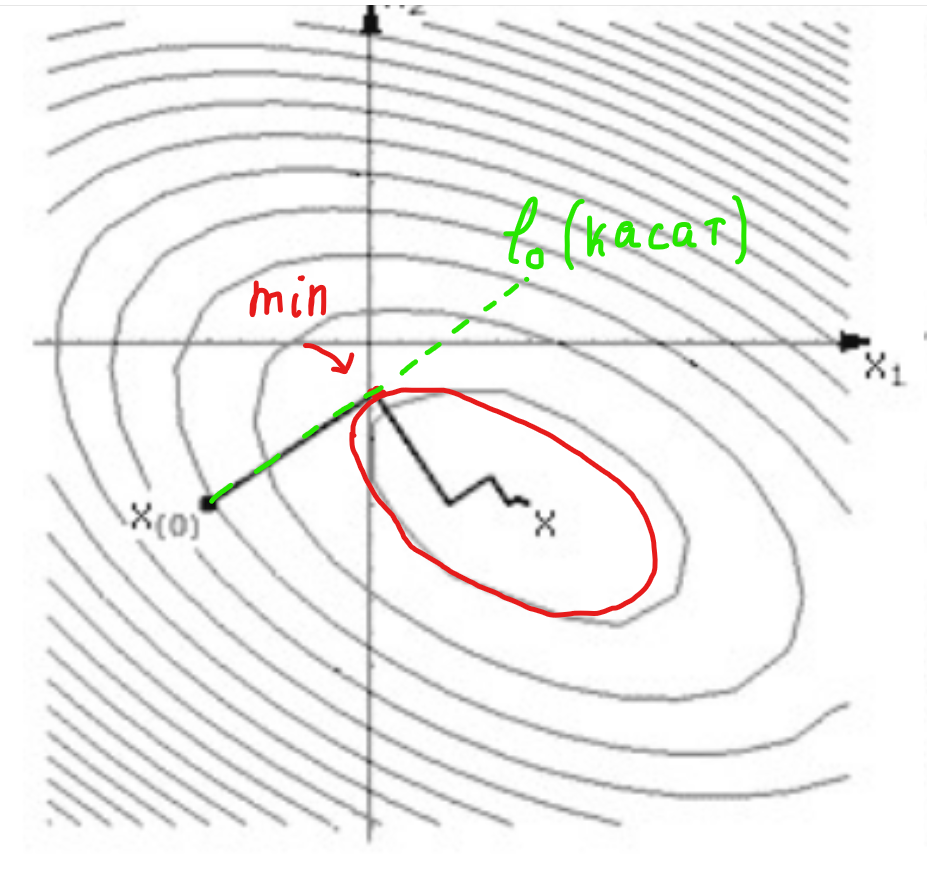

В методе наискорейшего спуска мы выбирали коэффциент $\alpha_n$ из минимизации фукнции по направлению $l_0$. Далее нарисуем изолинию (она как раз изображена на рисунке) - линия, на которой фукнция принимает постоянное значение. Наша прямая $l_0$ ее касается, иначе выбранная точка не являлась бы минимумом фукнции на прямой. Подсчитаем градиент функции. Можем разложить вектор градиента вдоль направления $l_0$ и перпендикулярном. - Градиент - максимальный спад функции. Если же градиент имеет проекции на прямую $l_0$, то тогда бы функция в этом направлении возрастала. Градиент перпендикулярен прямой $l_0$

### 5. Овальный

Градиентный метод сходится достаточно быстро, если для минимизируемой функции f (x) поверхности уровня близки к сферам (при n = 2 – к окружностям). Если же линии уровня сильно вытянуты в каком-то направлении, то по нормали к этому направлению целевая функция меняется значительно быстрее, чем вдоль направления. Такой характер целевой функции называется овражным. Исходя из рисунка, объясните, почему в этих случаях градиентный метод сходится хуже.

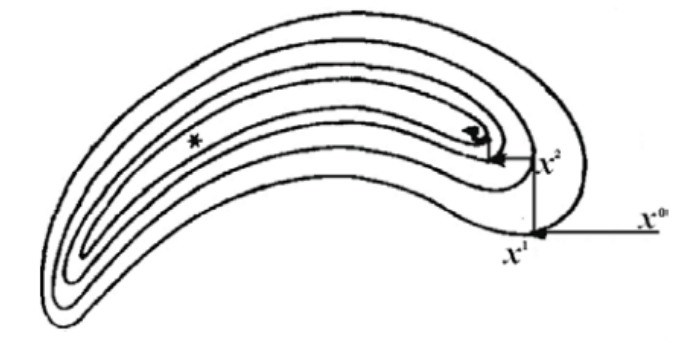

Как связан овражный характер функции с величиной наименьшего сингулярного числа матрицы квадратичной формы? А с величиной числа обусловленности матрицы?

На рисунке ниже изображена работа метода покоординатного спуска (поочередно минимизируем функцию вдоль каждой координаты однопараметрическим методом - совсем убого, поэтому не выдавали) для функций овражного характера. Какой вывод можно сделать из этого рисунка?

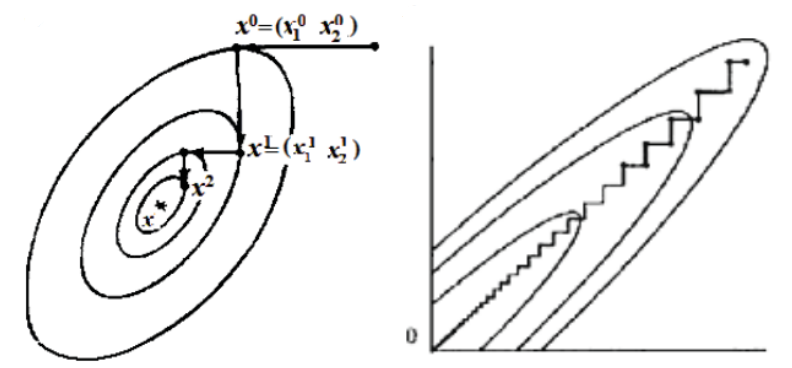 

Так как траектория наиболее вытянута, прямая, соответствующая "-" вектору градиента фукнции может иметь несколько минимумов. Но так как алгоритм выбирает первый локальный минимум, тогда мы можем спустя несколько итерация стремится к локальному минимому в некоторой области, который не может и не являться глобальным минимумом фукнции

Чем меньше величина наименьшее сингулярное число матрицы, чем больше будет овражность функции. Синглярные числа - собственные числа базисов или проще - величина полуосей многомерного эллипса, соответственно чем меньше будет величина сингулярного числа, чем меньше будет длина оси эллписа и тем вытенутее будет эллипс, соответственного функция. Можно также сказать, что число обусловоенности будет возрастать с овражностью функции

Чем больше овражность функции, тем быстрее коэффициент $\alpha_n$ стремится к нулю (см формулу градиентного спуска)